In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import log_loss, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc , precision_score , classification_report
from sklearn.linear_model import LogisticRegression
# from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')
import warnings
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('train_PDjVQMB.csv')


In [4]:
y_true = df['Is_Churn'].values
result = df

In [5]:
#Response Coding
def get_fea_dict(alpha, feature, df):

    value_count = train_df[feature].value_counts()
    gv_dict = dict()
    for i, denominator in value_count.items():
        vec = []
        for k in range(0,2):
            cls_cnt = train_df.loc[(train_df['Is_Churn']==k) & (train_df[feature]==i)]
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 20*alpha))
        gv_dict[i]=vec
    return gv_dict

def get_gv_feature(alpha, feature, df):
    gv_dict = get_fea_dict(alpha, feature, df)
    value_count = train_df[feature].value_counts()
    
    gv_fea = []
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/2,1/2])
    return gv_fea

In [6]:
df

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1
...,...,...,...,...,...,...,...,...,...,...,...
6645,a8216afd,61,Male,5L - 10L,1354526.19,4,1,2,1,Poor,1
6646,153a306b,42,Female,5L - 10L,596286.54,3,1,2,1,Average,0
6647,d4075a95,29,Male,Less than 5L,979298.19,2,0,2,0,Poor,0
6648,5855b142,66,Female,10L - 15L,395233.65,3,0,2,1,Poor,1


In [8]:
y_true = df['Is_Churn'].values
result = df
train_df, test_df,y_train, y_test = train_test_split(result, y_true, stratify = y_true, test_size = 0.2)

In [9]:
alpha = 1
train_Gender_response_coding = np.array(get_gv_feature(alpha, "Gender", train_df))
test_Gender_response_coding = np.array(get_gv_feature(alpha, "Gender", test_df))

In [11]:
Agency_train = pd.DataFrame(train_Gender_response_coding, columns=['Agency_1','Agency_2'])
Agency_test = pd.DataFrame(test_Gender_response_coding, columns=['Agency_1','Agency_2'])

In [12]:
alpha = 1
train_Income_response_coding = np.array(get_gv_feature(alpha, "Income", train_df))
test_Income_response_coding = np.array(get_gv_feature(alpha, "Income", test_df))

In [13]:
AgencyType_train = pd.DataFrame(train_Income_response_coding, columns=['AgencyType_1','AgencyType_2'])
AgencyType_test = pd.DataFrame(test_Income_response_coding, columns=['AgencyType_1','AgencyType_2'])

In [14]:
alpha = 1
train_DisChan_response_coding = np.array(get_gv_feature(alpha, "Vintage", train_df))
test_DisChan_response_coding = np.array(get_gv_feature(alpha, "Vintage", test_df))

In [15]:
DisChan_train = pd.DataFrame(train_DisChan_response_coding, columns=['DisChan_1','DisChan_2'])
DisChan_test = pd.DataFrame(test_DisChan_response_coding, columns=['DisChan_1','DisChan_2'])

In [16]:
alpha = 1
train_product_response_coding = np.array(get_gv_feature(alpha, "Transaction_Status", train_df))
test_product_response_coding = np.array(get_gv_feature(alpha, "Transaction_Status", test_df))

In [18]:
product_train = pd.DataFrame(train_product_response_coding, columns=['Product_1','Product_2'])
product_test = pd.DataFrame(test_product_response_coding, columns=['Product_1','Product_2'])

In [19]:
alpha = 1
train_destination_response_coding = np.array(get_gv_feature(alpha, "Product_Holdings", train_df))
test_destination_response_coding = np.array(get_gv_feature(alpha, "Product_Holdings", test_df))

In [20]:
destination_train = pd.DataFrame(train_destination_response_coding, columns=['Destination_1','Destination_2'])
destination_test = pd.DataFrame(test_destination_response_coding, columns=['Destination_1','Destination_2'])

In [22]:
alpha = 1
train_Credit_Category_response_coding = np.array(get_gv_feature(alpha, "Credit_Category", train_df))
test_Credit_Category_response_coding = np.array(get_gv_feature(alpha, "Credit_Category", test_df))

In [23]:
Credit_Category_train = pd.DataFrame(train_Credit_Category_response_coding, columns=['Credit_Category_1','Credit_Category_2'])
Credit_Category_test = pd.DataFrame(test_Credit_Category_response_coding, columns=['Credit_Category_1','Credit_Category_2'])

In [24]:
dtr = pd.concat([Agency_train,AgencyType_train,DisChan_train,product_train,destination_train,Credit_Category_train],1)
dte = pd.concat([Agency_test,AgencyType_test,DisChan_test,product_test,destination_test,Credit_Category_test],1)

In [35]:
col_name = final_test_res.columns.tolist()
feature_rf_res= rf_res.feature_importances_.tolist()
RF_res_feature = pd.DataFrame(feature_rf_res,col_name)
RF_res_feature = RF_res_feature.sort_values(by =[0])
RF_res_feature

,0
Product_1,0.013987
Product_2,0.015754
Agency_2,0.017193
Agency_1,0.017856
Destination_1,0.024960
Destination_2,0.025787
Credit_Category_1,0.034175
Credit_Category_2,0.034575
AgencyType_2,0.054678
AgencyType_1,0.056976


In [26]:
train_df

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
1581,56d244ad,35,Male,10L - 15L,1454305.32,1,1,2,1,Poor,0
3574,739afbba,34,Female,More than 15L,2392389.81,2,1,1,1,Average,0
4547,62079935,46,Female,More than 15L,907884.09,0,0,2,1,Poor,0
5418,4d941f33,48,Male,10L - 15L,159818.76,1,0,2,0,Average,0
2588,09f79710,43,Female,More than 15L,427884.93,3,1,1,1,Poor,1
...,...,...,...,...,...,...,...,...,...,...,...
340,dccb724a,45,Female,More than 15L,370241.19,4,1,2,1,Poor,0
1163,ce3c30a5,51,Female,10L - 15L,126578.52,2,1,2,1,Average,0
485,baf51fff,33,Female,More than 15L,766114.02,3,0,2,0,Good,0
2585,dc0864f2,58,Male,Less than 5L,1026088.38,3,0,1,1,Poor,1


In [27]:
num_train = train_df.iloc[::,[1,4]]
num_test = test_df.iloc[::,[1,4]]
cols = list(num_train.columns)
cols

['Age', 'Balance']

In [28]:
scalar = StandardScaler(with_mean=False)
scale_train = pd.DataFrame(scalar.fit_transform(num_train),columns=cols)
scale_test = pd.DataFrame(scalar.transform(num_test),columns=cols)

In [29]:
final_train_res = pd.concat([dtr,scale_train],1)
final_test_res = pd.concat([dte,scale_test],1)
print('X')
print(final_train_res.shape)
print(final_test_res.shape)
print('y')
print(y_train.shape)
print(y_test.shape)

X
(5320, 14)
(1330, 14)
y
(5320,)
(1330,)


In [30]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
 
    A =(((C.T)/(C.sum(axis=1))).T)

    B =(C/C.sum(axis=0))

    labels = [0,1]
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(5,3))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(5,3))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(5,3))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

In [39]:
[10**x for x in range(-4,5)]

[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

In [36]:
def logit(Xtrain,ytrain):
    """
    Function to find the best hyperparameter
    Input : Training Dataset
    ---
    Output : best hyperparameter
    """
    parameters = [{'C': [10**x for x in range(-4,5)]}]
    K =[10**x for x in range(-4,5)]
    K = np.log10(K)
    
    log= LogisticRegression(class_weight = 'balanced')
    clf = GridSearchCV(log, parameters, cv=5, scoring='roc_auc',return_train_score=True)
    clf.fit(Xtrain, ytrain)

    train_auc= clf.cv_results_['mean_train_score']
    train_auc_std= clf.cv_results_['std_train_score']
    cv_auc = clf.cv_results_['mean_test_score'] 
    cv_auc_std= clf.cv_results_['std_test_score']
    lamb= clf.best_params_
    lamb = list(lamb.values())[0]

    plt.plot(K, train_auc, label='Train AUC')
    # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
    plt.gca().fill_between(K,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')
    
    plt.plot(K, cv_auc, label='CV AUC')
    plt.gca().fill_between(K,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
    plt.scatter(K, train_auc, label='Train AUC points')
    plt.scatter(K, cv_auc, label='CV AUC points')
    plt.grid(True)
    plt.legend()
    plt.xlabel("K: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.show()
    return lamb

def final_logl2(Xtrain,ytrain,Xtest,ytest,best_c):
    """
    Function to find the model with best hyperparameter
    Input : Training data, Test Data and best value of c
    ---
    Output : best trained model
    """
    logl2 = LogisticRegression(C= best_c,class_weight = 'balanced')
    logl2.fit(Xtrain, ytrain)
    train_fpr, train_tpr, thresholds = roc_curve(ytrain, logl2.predict_proba(Xtrain)[:,1])
    test_fpr, test_tpr, thresholds = roc_curve(ytest, logl2.predict_proba(Xtest)[:,1])
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.grid(True)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.show()
    return logl2


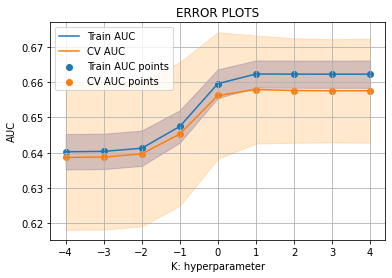

best c using L2 : 10
Wall time: 2.72 s


In [37]:
%%time
best_c_res = logit(final_train_res,y_train)
print('best c using L2 :',best_c_res)

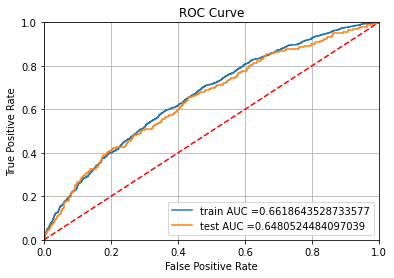

-------------------- Confusion matrix --------------------


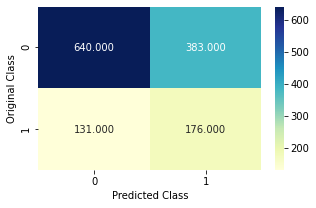

-------------------- Precision matrix (Columm Sum=1) --------------------


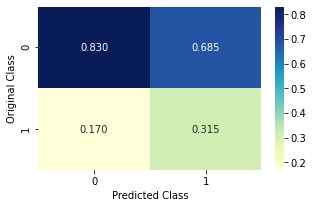

-------------------- Recall matrix (Row sum=1) --------------------


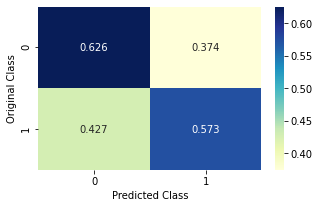

In [38]:
log_model_res= final_logl2(final_train_res,y_train,final_test_res, y_test,best_c_res)
plot_confusion_matrix(y_test,log_model_res.predict(final_test_res))

In [31]:
def best_RF(Xtrain,ytrain):
    """
    Function to find the best hyperparameter of random forest
    Returns : best depth and best number of models
    ---
    Input : Training dataset
    """
    # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
    max_depth = [230,250,280,300]
    n_models = [150,170,200,230,260]
    parameters = {'max_depth':  max_depth, 'n_estimators' :n_models}
    clftree = RandomForestClassifier(class_weight='balanced')
    clf = GridSearchCV(clftree,parameters,cv=5, scoring='roc_auc',return_train_score=True)
    clf.fit(Xtrain,ytrain)
    tab = pd.DataFrame(clf.cv_results_)
    import seaborn as sns
    plt.figure(figsize=(15, 8))
    max_scores = tab.groupby(['param_max_depth','param_n_estimators']).max()
    max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]
    sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g')
    plt.title('Grid Search CV Score on Train and Test Data')
    plt.show()
    best_parameter= clf.best_params_
    print('Best depth: ', clf.best_estimator_.max_depth)
    print('Best n estimators: ', clf.best_estimator_.n_estimators)
    return clf.best_estimator_.max_depth, clf.best_estimator_.n_estimators

def final_RF( Xtrain ,ytrain ,Xtest ,ytest , param1 , param2):
    """
    Returns : threshold values, False positive rate , True positive rate and the trained model
    ---
    Input : Train dataset, Test Dataset , best parameters
    """
    clftre = RandomForestClassifier(class_weight='balanced',n_estimators=param1, max_depth=param2,criterion='entropy',min_samples_leaf=3)
    clftre.fit(Xtrain,ytrain)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    train_fpr, train_tpr, thresholds = roc_curve(ytrain, clftre.predict_proba(Xtrain)[:,1])
    test_fpr, test_tpr, thresholds = roc_curve(ytest, clftre.predict_proba(Xtest)[:,1])
    
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.grid(True)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.show()
    return  clftre

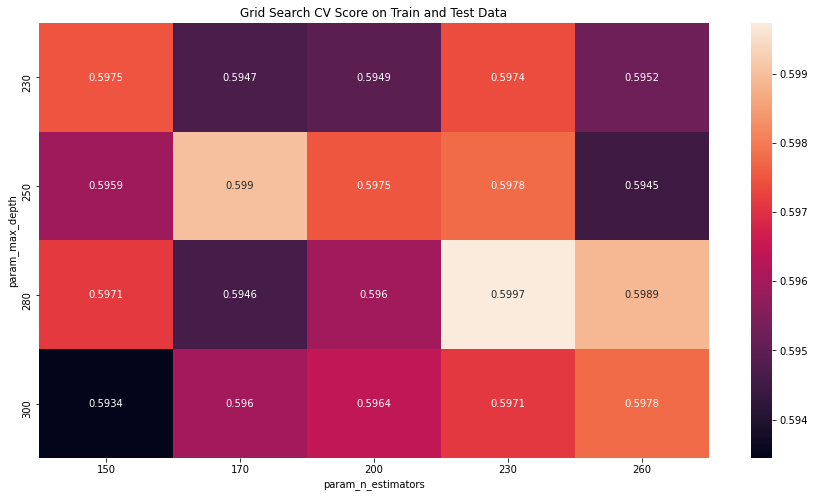

Best depth:  280
Best n estimators:  230
Wall time: 1min 25s


In [32]:
%%time
best_depth_rf_res, best_samle_split_rf_res = best_RF(final_train_res,y_train)

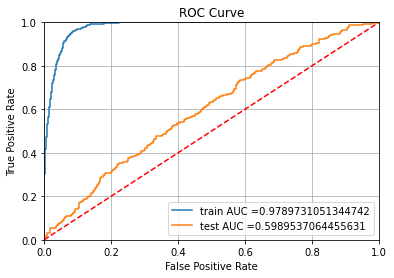

-------------------- Confusion matrix --------------------


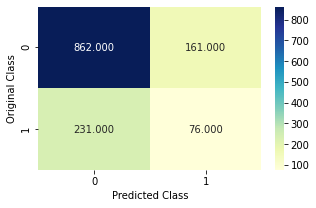

-------------------- Precision matrix (Columm Sum=1) --------------------


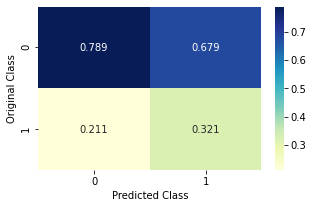

-------------------- Recall matrix (Row sum=1) --------------------


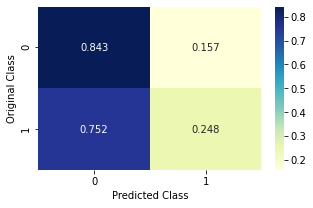

In [33]:
rf_res= final_RF(final_train_res,y_train, final_test_res, y_test,best_samle_split_rf_res,best_depth_rf_res)
plot_confusion_matrix(y_test,rf_res.predict(final_test_res))

,0
Product_1,0.013987
Product_2,0.015754
Agency_2,0.017193
Agency_1,0.017856
Destination_1,0.024960
Destination_2,0.025787
Credit_Category_1,0.034175
Credit_Category_2,0.034575
AgencyType_2,0.054678
AgencyType_1,0.056976
